# ☄️ Meteor Madness Impact Simulator
**NASA Space Apps Challenge 2025 Project**  
Built by Preethika & Pradhyun Yetukuri

This notebook lets users simulate asteroid impact scenarios using:
- Diameter + speed inputs
- Physics-based equations for energy, crater, and quake
- Optional deflection scenario
- Interactive graphs and outputs

Inspired by "Impactor-2025" and the need for public tools to visualize asteroid risk.


In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [12]:
def calculate_kinetic_energy(diameter_m, velocity_mps):
    radius = diameter_m / 2
    volume = (4/3) * math.pi * radius**3
    density = 3000  # kg/m³ (rocky asteroid)
    mass = density * volume
    energy = 0.5 * mass * velocity_mps**2
    return energy

def estimate_crater_diameter(energy_joules):
    k = 0.07
    crater_km = k * (energy_joules ** 0.25) / 1000  # km
    return crater_km

def estimate_magnitude(energy_joules):
    magnitude = (2/3) * (math.log10(energy_joules)) - 3.2
    return magnitude


In [13]:
def simulate_impact(diameter_m=140, velocity_kmps=19):
    velocity_mps = velocity_kmps * 1000
    energy = calculate_kinetic_energy(diameter_m, velocity_mps)
    crater = estimate_crater_diameter(energy)
    magnitude = estimate_magnitude(energy)

    print(f"🌠 Asteroid Diameter: {diameter_m} m")
    print(f"🚀 Velocity: {velocity_kmps} km/s")
    print(f"💥 Energy: {energy:.2e} J")
    print(f"🌋 Crater Diameter: {crater:.2f} km")
    print(f"🌍 Earthquake Magnitude: {magnitude:.2f}")

    labels = ['Energy (x10¹⁵ J)', 'Crater (km)', 'Magnitude']
    values = [energy / 1e15, crater, magnitude]

    plt.bar(labels, values, color=['orange', 'gray', 'red'])
    plt.title('Impact Metrics')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

interact(simulate_impact,
         diameter_m=FloatSlider(value=140, min=10, max=1000, step=10, description='Diameter (m)'),
         velocity_kmps=FloatSlider(value=19, min=5, max=70, step=1, description='Velocity (km/s)'))


interactive(children=(FloatSlider(value=140.0, description='Diameter (m)', max=1000.0, min=10.0, step=10.0), F…

<function __main__.simulate_impact(diameter_m=140, velocity_kmps=19)>

In [14]:
def simulate_deflection(diameter_m=140, velocity_kmps=19, deflect_percent=10):
    v_init = velocity_kmps * 1000
    v_new = v_init * (1 - deflect_percent / 100)

    e_init = calculate_kinetic_energy(diameter_m, v_init)
    e_new = calculate_kinetic_energy(diameter_m, v_new)

    crater_init = estimate_crater_diameter(e_init)
    crater_new = estimate_crater_diameter(e_new)

    print(f"💥 Original Energy: {e_init:.2e} J")
    print(f"🛡️ Deflected Energy: {e_new:.2e} J")
    print(f"🌋 Crater Size: {crater_init:.2f} km → {crater_new:.2f} km")

    labels = ['Original', 'Deflected']
    values = [crater_init, crater_new]

    plt.bar(labels, values, color=['red', 'green'])
    plt.title('Crater Size Before & After Deflection')
    plt.ylabel('Crater Diameter (km)')
    plt.grid(True)
    plt.show()

interact(simulate_deflection,
         diameter_m=FloatSlider(value=140, min=10, max=1000, step=10),
         velocity_kmps=FloatSlider(value=19, min=5, max=70, step=1),
         deflect_percent=FloatSlider(value=10, min=1, max=50, step=1, description='Deflect %'))


interactive(children=(FloatSlider(value=140.0, description='diameter_m', max=1000.0, min=10.0, step=10.0), Flo…

<function __main__.simulate_deflection(diameter_m=140, velocity_kmps=19, deflect_percent=10)>

### Deflection Planning with Policy Insight

Deflecting an asteroid isn’t just a technical challenge, it’s a policy and planning decision. The sooner a deflection mission is launched, the more impact energy can be reduced, saving lives and infrastructure.

This interactive simulation lets you explore:

- How early action (in years before impact) reduces energy and crater size  
- How much velocity reduction is achieved  
- The potential difference in disaster severity between no action and timely action

Use the slider to test how effective different mission lead times are in reducing risk.


In [15]:
def simulate_deflection(diameter_m=140, velocity_kmps=19, years_until_impact=5):
    v_init = velocity_kmps * 1000
    deflect_percent = min(0.05 * years_until_impact, 0.5)  # Cap deflection at 50%
    v_new = v_init * (1 - deflect_percent)

    e_init = calculate_kinetic_energy(diameter_m, v_init)
    e_new = calculate_kinetic_energy(diameter_m, v_new)

    crater_init = estimate_crater_diameter(e_init)
    crater_new = estimate_crater_diameter(e_new)

    # risk assessment directly inside here
    def assess_risk(crater_size, mag):
        if crater_size > 5 or mag > 7:
            return "🔴 High Risk"
        elif crater_size > 1 or mag > 5:
            return "🟡 Moderate Risk"
        else:
            return "🟢 Low Risk"

    # magnitude is based on deflected energy
    magnitude = estimate_magnitude(e_new)
    risk_level = assess_risk(crater_new, magnitude)

    print(f"🕒 Years Until Impact: {years_until_impact}")
    print(f"🛡️ Deflection: {deflect_percent*100:.1f}% of velocity reduced")
    print(f"💥 Original Energy: {e_init:.2e} J")
    print(f"🛡️ Deflected Energy: {e_new:.2e} J")
    print(f"🌋 Crater Size: {crater_init:.2f} km → {crater_new:.2f} km")
    print(f"📊 Risk Assessment: {risk_level}")

    plt.bar(['Original', 'Deflected'], [crater_init, crater_new], color=['red', 'green'])
    plt.title('Crater Size Before & After Deflection')
    plt.ylabel('Crater Diameter (km)')
    plt.grid(True)
    plt.show()


🕒 Years Until Impact: 5
🛡️ Deflection: 25.0% of velocity reduced
💥 Original Energy: 7.78e+17 J
🛡️ Deflected Energy: 4.38e+17 J
🌋 Crater Size: 2.08 km → 1.80 km
📊 Risk Assessment: 🔴 High Risk


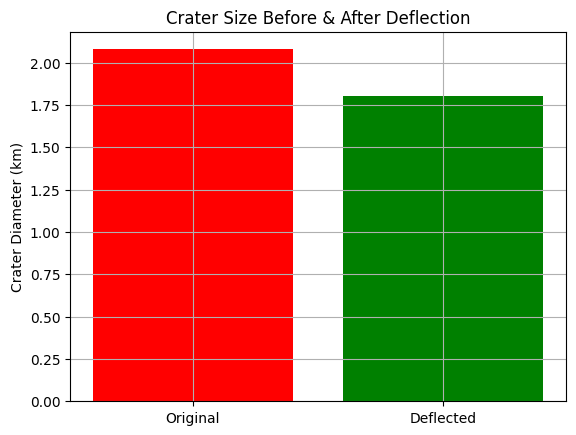

In [16]:
simulate_deflection()

## 🧠 Risk Interpretation & Public Policy Messaging

This tool goes beyond simulation,  it supports public risk communication and policy decision-making by:

- Classifying asteroid threats by crater size and earthquake magnitude
- Allowing users to simulate the timing of deflection missions
- Showing how earlier action dramatically reduces risk

Based on your inputs, the system provides a real-time risk assessment and guidance on potential mitigation.

**Examples:**
- 🔴 High Risk → Initiate evacuation planning, begin public awareness campaigns
- 🟡 Moderate Risk → Monitor regularly, explore budget for deflection
- 🟢 Low Risk → Educate public, continue data collection


## Why This Matters

Impactor-2025 is a fictional scenario, but NASA tracks over 26,000 near-Earth asteroids (NEAs) and over 14,000 that are larger than 140 meters remain undiscovered.

This tool helps:
- Scientists prototype risks
- The public visualize damage
- Students explore asteroid science

## Future Work

- Add live data from NASA's NEO API
- Use USGS elevation data to simulate tsunamis
- Integrate with OpenMDAO to optimize deflection strategy
- Translate for education across languages

---
**Created by Preethika Yetukuri & Pradhyun Yetukuri**  
NASA Space Apps Challenge 2025 - Universal Event
